# Pet Adoption - Classification

Questions:
1. What is the overall adoption rate of pets in the dataset?
2. Do adoption rates vary by pet type?
3. What are the key factors that influence whether a pet gets adopted?
4. Does the pet's age affect its likelihood of adoption?
5. Is there a relation between the pet's breed and its adoption status?
6. Do specific attributes like color, breed, or health status impact adoption rates?
7. What is the average time it takes for pets to get adopted?
8. How do different factors (age, breed, health status) affect the time to adoption?
9. How do special conditions (e.g., disabilities) impact the adoption chances of pets?
10. How does the vaccination status of pets affect their adoption rates?


Steps:
1. Import Libraries
2. Import Dataset
3. Exploratory data analysis - Answer above questions
4. Splitting Data
5. Standardization
6. Encoding
7. Synthetic Sampling
8. Model Selection
9. Optimization

## 1. Import Libraries

In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report, recall_score

## 2. Import Dataset

In [10]:
# Read CSV
pet_adoption = pd.read_csv('Resources/pet_adoption_data.csv')
# View the dataframe
pet_adoption

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [11]:
# Drop the 'PetID' column and reset the index
pet_adoption.drop(columns='PetID', inplace=True)
# View the head of the dataframe
pet_adoption.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


## 3. Exploratory data analysis

In [12]:
# Shape of the dataframe
pet_adoption.shape

(2007, 12)

In [13]:
# Check dataframe for null values
pet_adoption.isnull().sum()

PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [14]:
# Use describe function to see the statistics
pet_adoption.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


### 3.1 What is the overall adoption rate of pets in the dataset?


In [15]:
# Overall adoption rate
adoption_rate_overall = pet_adoption['AdoptionLikelihood'].mean() * 100
# Print the rate
print(f'Overall adoption rate: {adoption_rate_overall:.2f}%')

Overall adoption rate: 32.84%


In [16]:
px.pie(names = ['Adopted', 'Not Adopted'], 
       values = [adoption_rate_overall, 100 - adoption_rate_overall], 
       color_discrete_sequence=['#00008B','#66b3ff'])

### 3.2 Do adoption rates vary by pet type?




In [17]:
# Calculate adoption rate by pet type
adoption_rate_by_pet_type = pet_adoption.groupby('PetType')['AdoptionLikelihood'].mean() * 100
# Sort results
adoption_rate_by_pet_type.sort_values(ascending=False, inplace=True)
# Display results
adoption_rate_by_pet_type

PetType
Dog       46.360153
Bird      30.184805
Cat       28.712871
Rabbit    25.354970
Name: AdoptionLikelihood, dtype: float64

In [18]:
px.bar(adoption_rate_by_pet_type, 
       color=adoption_rate_by_pet_type,
       color_continuous_scale = 'RdPu', 
       labels = {'value': 'Adoption Rate (%)', 'color': 'Perc', 'PetType': 'Pet Type'})

### 3.3 What are the key factors that influence whether a pet gets adopted?

This question is answered in section 9.5 after selecting a model

### 3.4 Does the pet's age affect its likelihood of adoption?

In [19]:
# Visualize the data with a histogram
px.histogram(pet_adoption[pet_adoption['AdoptionLikelihood'] == 1]['AgeMonths'], nbins=50)

The histogram shows that the likelihood of a pet getting adopted is higher for pets aged under 2

In [20]:
# Create bins
bins = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180]
# Create names for bins
group_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']

In [21]:
# Add data to bins
pet_adoption['Age'] = pd.to_numeric(pd.cut(pet_adoption['AgeMonths'], bins, labels=group_names))
# View the pet adoption dataframe
pet_adoption.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,Age
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,10
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,6
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,11
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,8
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,10


In [22]:
# Create a custom function to calculate the percentages
def impact_percentage(column_name):
    groupby_df = pet_adoption.groupby([column_name, 'AdoptionLikelihood'])['AdoptionLikelihood'].count()
    groupby_percentages = {column_name: [], 'Percentage': []}

    for value in pet_adoption[column_name].unique().tolist():
        groupby_percentages[column_name].append(value)
        groupby_percentages['Percentage'].append(groupby_df[value][1]/(groupby_df[value][0] + groupby_df[value][1]) * 100)
    
    return pd.DataFrame(groupby_percentages).sort_values('Percentage', ascending=False).reset_index(drop=True)

In [23]:
# Get percetages for age
age_df = impact_percentage('Age').sort_values('Age').reset_index(drop=True)
# View the dataframe
age_df

,Age,Percentage
0,0,67.883212
1,1,69.852941
2,2,27.966102
3,3,28.813559
4,4,28.776978
5,5,32.812500
6,6,28.455285
7,7,28.099174
8,8,22.758621
9,9,23.611111


In [24]:
# Calculate the difference in percentage for pets under 2 years and over 2 years
age_df.loc[0:1,'Percentage'].mean()/age_df.loc[2:,'Percentage'].mean()

2.5255420071067527

### 3.5 Is there a relation between the pet's breed and its adoption status?


In [25]:
breed_df = impact_percentage('Breed')
breed_df

,Breed,Percentage
0,Labrador,72.020725
1,Poodle,33.532934
2,Siamese,30.830040
3,Parakeet,30.184805
4,Golden Retriever,29.012346
5,Persian,26.587302
6,Rabbit,25.354970


### 3.6 Do specific attributes like color, breed, or health status impact adoption rates?


In [26]:
color_df = impact_percentage('Color')
color_df

,Color,Percentage
0,Orange,34.718826
1,Gray,34.250000
2,Black,34.177215
3,Brown,32.637076
4,White,28.571429


In [27]:
size_df = impact_percentage('Size')
size_df

,Size,Percentage
0,Medium,62.324930
1,Small,17.647059
2,Large,15.396825


### 3.7 What is the average time it takes for pets to get adopted?


In [28]:
# Calculate adoption rate by pet type
adoption_rate_by_time = pet_adoption.groupby(['AdoptionLikelihood'])['TimeInShelterDays'].mean()
# Sort results
adoption_rate_by_time.sort_values(ascending=False, inplace=True)
# Display results
adoption_rate_by_time

AdoptionLikelihood
1    44.300455
0    43.814540
Name: TimeInShelterDays, dtype: float64

### 3.8 How do different factors (age, breed, health status) affect the time to adoption?


In [29]:
pet_adoption.columns

Index(['PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood', 'Age'],
      dtype='object')

In [30]:
# Calculate adoption rate by pet type
adoption_rate_by_pet_type = pet_adoption[pet_adoption['AdoptionLikelihood'] == 1]\
                            .groupby('PetType')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_pet_type.sort_values(ascending=False, inplace=True)
# Display results
adoption_rate_by_pet_type

PetType
Rabbit    47.912000
Dog       43.657025
Cat       43.427586
Bird      43.149660
Name: TimeInShelterDays, dtype: float64

In [31]:
# Calculate adoption rate by Breed
adoption_rate_by_breed = pet_adoption[pet_adoption['AdoptionLikelihood'] == 1]\
                            .groupby('Breed')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_breed.sort_values(ascending=False, inplace=True)
# Display results
adoption_rate_by_breed

Breed
Rabbit              47.912000
Golden Retriever    46.212766
Siamese             45.423077
Labrador            44.359712
Parakeet            43.149660
Persian             41.104478
Poodle              39.767857
Name: TimeInShelterDays, dtype: float64

In [32]:
# Calculate adoption rate by Age
adoption_rate_by_age = pet_adoption[pet_adoption['AdoptionLikelihood'] == 1]\
                            .groupby('Age')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_age
# Display results
adoption_rate_by_age

Age
0     41.322581
1     41.073684
2     42.666667
3     40.558824
4     39.250000
5     47.547619
6     48.000000
7     41.941176
8     50.454545
9     50.823529
10    47.885714
11    43.972222
12    50.571429
13    44.000000
14    44.028571
Name: TimeInShelterDays, dtype: float64

In [33]:
# Calculate adoption rate by Color
adoption_rate_by_color = pet_adoption[pet_adoption['AdoptionLikelihood'] == 1]\
                            .groupby('Color')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_color
# Display results
adoption_rate_by_color

Color
Black     45.674074
Brown     41.448000
Gray      42.569343
Orange    48.007042
White     43.316667
Name: TimeInShelterDays, dtype: float64

In [34]:
# Calculate adoption rate by Size
adoption_rate_by_size = pet_adoption[pet_adoption['AdoptionLikelihood'] == 1]\
                            .groupby('Size')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_size
# Display results
adoption_rate_by_size

Size
Large     42.814433
Medium    43.755056
Small     47.606838
Name: TimeInShelterDays, dtype: float64

In [35]:
# Calculate adoption rate by Vaccinated
adoption_rate_by_vaccinated = pet_adoption[pet_adoption['AdoptionLikelihood'] == 1]\
                            .groupby('Vaccinated')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_vaccinated
# Display results
adoption_rate_by_vaccinated

Vaccinated
0    44.477612
1    44.280405
Name: TimeInShelterDays, dtype: float64

In [36]:
# Calculate adoption rate by Health Condition
adoption_rate_by_healthcondition = pet_adoption[pet_adoption['AdoptionLikelihood'] == 1]\
                            .groupby('HealthCondition')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_healthcondition
# Display results
adoption_rate_by_healthcondition

HealthCondition
0    44.252818
1    45.078947
Name: TimeInShelterDays, dtype: float64

In [37]:
# Calculate adoption rate by Previous Owner
adoption_rate_by_owner = pet_adoption[pet_adoption['AdoptionLikelihood'] == 1]\
                            .groupby('PreviousOwner')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_owner
# Display results
adoption_rate_by_owner

PreviousOwner
0    43.582979
1    46.084656
Name: TimeInShelterDays, dtype: float64

Based on our data the average number of days does not really differ based on different factors

### 3.9 How do special conditions (e.g., disabilities) impact the adoption chances of pets?


In [38]:
health_condition_df = impact_percentage('HealthCondition')
health_condition_df

,HealthCondition,Percentage
0,0,38.49969
1,1,9.64467


### 3.10 How does the vaccination status of pets affect their adoption rates?

In [39]:
vaccinated_df = impact_percentage('Vaccinated')
vaccinated_df

,Vaccinated,Percentage
0,1,42.075338
1,0,11.166667


In [40]:
pet_adoption.drop(columns='Age', inplace=True)

### 3.11 Important features based on Chi Square test

In [63]:
pet_adoption.columns

Index(['PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [72]:
# Function to get the relation between two features in a dataframe
def chi_score(column, df):
    contingency_table = pd.crosstab(df[column], df['AdoptionLikelihood'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return p_value

In [73]:
# Create a dictionary to hold the features and p-values
p_values = {'Feature': [], 'p-value': []}
# Loop through all the features
for column_name in pet_adoption.columns:
    # Add the values
    p_values['Feature'].append(column_name)
    p_values['p-value'].append(chi_score(column_name, pet_adoption))

In [77]:
# Convert the dictionary to a dataframe
p_values = pd.DataFrame(p_values).sort_values('p-value').reset_index(drop=True)
# View the p_values dataframe
p_values

,Feature,p-value
0,AdoptionLikelihood,0.000000e+00
1,Size,8.689265e-96
2,Vaccinated,3.219385e-41
3,Breed,8.773886e-31
4,HealthCondition,1.533158e-27
5,AgeMonths,3.505834e-14
6,PetType,3.180893e-13
7,Color,3.070622e-01
8,PreviousOwner,3.263216e-01
9,WeightKg,4.895050e-01


## 4. Splitting Data

In [33]:
# Setup X and y variables
X = pet_adoption.drop(columns='AdoptionLikelihood')
y = pet_adoption['AdoptionLikelihood'].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)
X_train.describe()

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,91.847841,15.730955,0.691694,0.193355,44.019934,250.399336,0.305648
std,52.525438,8.277922,0.461947,0.395061,25.602181,143.642099,0.460834
min,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,8.879518,0.000000,0.000000,21.000000,128.000000,0.000000
50%,94.000000,15.919121,1.000000,0.000000,45.000000,245.000000,0.000000
75%,139.000000,22.702464,1.000000,0.000000,66.000000,377.000000,1.000000
max,179.000000,29.992795,1.000000,1.000000,89.000000,499.000000,1.000000


## 5. Preprocessing - Standardization

### 5.1 Age

In [34]:
# Use standard scaler (-1 to 1) to scale the data
scaler = StandardScaler()
# Fit the scaler with the X_train data
scaler.fit(X_train[['AgeMonths']])

StandardScaler()

In [35]:
# Transform the X_train and X_test data with the scaler
X_train_age_scaled = scaler.transform(X_train[['AgeMonths']])
X_test_age_scaled = scaler.transform(X_test[['AgeMonths']])

In [36]:
# Replace the columns in the X_train and X_test data
X_train['AgeMonths'] = X_train_age_scaled
X_test['AgeMonths'] = X_test_age_scaled
# View the head of the dataframe
X_train.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,0.878955,White,Medium,1.862352,1,0,78,267,0
913,Cat,Persian,1.526476,Gray,Medium,9.262484,1,0,84,346,0
1451,Bird,Parakeet,1.240805,White,Large,15.967909,0,0,20,393,1
259,Cat,Siamese,-0.435131,Gray,Medium,11.486612,1,1,3,201,0
1556,Bird,Parakeet,0.155256,Brown,Large,22.702464,1,0,24,496,0


### 5.2 Weight

In [37]:
# Use standard scaler (-1 to 1) to scale the data
scaler = StandardScaler()
# Fit the scaler with the X_train data
scaler.fit(X_train[['WeightKg']])

StandardScaler()

In [38]:
# Transform the X_train and X_test data with the scaler
X_train_weight_scaled = scaler.transform(X_train[['WeightKg']])
X_test_weight_scaled = scaler.transform(X_test[['WeightKg']])

In [39]:
# Replace the columns in the X_train and X_test data
X_train['WeightKg'] = X_train_weight_scaled
X_test['WeightKg'] = X_test_weight_scaled
# View the head of the dataframe
X_train.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,0.878955,White,Medium,-1.675930,1,0,78,267,0
913,Cat,Persian,1.526476,Gray,Medium,-0.781672,1,0,84,346,0
1451,Bird,Parakeet,1.240805,White,Large,0.028634,0,0,20,393,1
259,Cat,Siamese,-0.435131,Gray,Medium,-0.512901,1,1,3,201,0
1556,Bird,Parakeet,0.155256,Brown,Large,0.842461,1,0,24,496,0


### 5.3 Time in Shelter

In [40]:
# Use standard scaler (-1 to 1) to scale the data
scaler = StandardScaler()
# Fit the scaler with the X_train data
scaler.fit(X_train[['TimeInShelterDays']])

StandardScaler()

In [41]:
# Transform the X_train and X_test data with the scaler
X_train_time_shelter_scaled = scaler.transform(X_train[['TimeInShelterDays']])
X_test_time_shelter_scaled = scaler.transform(X_test[['TimeInShelterDays']])

In [42]:
# Replace the columns in the X_train and X_test data
X_train['TimeInShelterDays'] = X_train_time_shelter_scaled
X_test['TimeInShelterDays'] = X_test_time_shelter_scaled
# View the head of the dataframe
X_train.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,0.878955,White,Medium,-1.675930,1,0,1.327674,267,0
913,Cat,Persian,1.526476,Gray,Medium,-0.781672,1,0,1.562107,346,0
1451,Bird,Parakeet,1.240805,White,Large,0.028634,0,0,-0.938511,393,1
259,Cat,Siamese,-0.435131,Gray,Medium,-0.512901,1,1,-1.602737,201,0
1556,Bird,Parakeet,0.155256,Brown,Large,0.842461,1,0,-0.782222,496,0


### 5.4 Adoption Fee

In [43]:
# Use standard scaler (-1 to 1) to scale the data
scaler = StandardScaler()
# Fit the scaler with the X_train data
scaler.fit(X_train[['AdoptionFee']])

StandardScaler()

In [44]:
# Transform the X_train and X_test data with the scaler
X_train_fee_scaled = scaler.transform(X_train[['AdoptionFee']])
X_test_fee_scaled = scaler.transform(X_test[['AdoptionFee']])

In [45]:
# Replace the columns in the X_train and X_test data
X_train['AdoptionFee'] = X_train_fee_scaled
X_test['AdoptionFee'] = X_test_fee_scaled
# View the head of the dataframe
X_train.head()

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,0.878955,White,Medium,-1.675930,1,0,1.327674,0.115608,0
913,Cat,Persian,1.526476,Gray,Medium,-0.781672,1,0,1.562107,0.665769,0
1451,Bird,Parakeet,1.240805,White,Large,0.028634,0,0,-0.938511,0.993080,1
259,Cat,Siamese,-0.435131,Gray,Medium,-0.512901,1,1,-1.602737,-0.344020,0
1556,Bird,Parakeet,0.155256,Brown,Large,0.842461,1,0,-0.782222,1.710378,0


## 6. Preprocessing - Encoding

### 6.1 - Pet Type

In [46]:
# One Hot Encoder object
encode_pet_type = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
# Fit the encoder with X_train
encode_pet_type.fit(X_train['PetType'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

### 6.2 - Breed

In [47]:
# One Hot Encoder
encode_breed = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
# Fit the encoder with X_train
encode_breed.fit(X_train['Breed'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

### 6.3 Color

In [48]:
# One Hot Encoder
encode_color = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
# Fit the encoder with X_train
encode_color.fit(X_train['Color'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

### 6.4 Size

In [49]:
# Ordinal Encoder
encode_size = OrdinalEncoder(categories=[['Small','Medium','Large']], encoded_missing_value=-1)
# Fit the encoder with X_train
encode_size.fit(X_train['Size'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['Small', 'Medium', 'Large']],
               encoded_missing_value=-1)

### 6.5 - Encode

In [50]:
# Combine the encoders into a function
def encode_categorical(X_data):
    # Separate numeric columns
    X_data_numeric = X_data.select_dtypes(include='number').reset_index(drop=True)
    # Multicolumn encoders first
    pet_type_encoded = pd.DataFrame(encode_pet_type.transform(X_data['PetType'].values.reshape(-1, 1)), columns=encode_pet_type.get_feature_names_out())
    breed_encoded = pd.DataFrame(encode_breed.transform(X_data['Breed'].values.reshape(-1, 1)), columns=encode_breed.get_feature_names_out())
    color_encoded = pd.DataFrame(encode_color.transform(X_data['Color'].values.reshape(-1, 1)), columns=encode_color.get_feature_names_out())
    # Concat all dfs together
    dfs = [X_data_numeric, pet_type_encoded, breed_encoded, color_encoded]
    X_data_encoded = pd.concat(dfs, axis=1)
    # Add single column encoders
    X_data_encoded['Size'] = encode_size.transform(X_data['Size'].values.reshape(-1, 1))
    
    return X_data_encoded

In [51]:
# Apply the encoding function to both training and testing sets
X_train = encode_categorical(X_train)
X_test = encode_categorical(X_test)

In [52]:
# View the encoded dataframes
display(X_train.head())
display(X_test.head())

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,x0_Cat,x0_Dog,x0_Rabbit,...,x0_Parakeet,x0_Persian,x0_Poodle,x0_Rabbit,x0_Siamese,x0_Brown,x0_Gray,x0_Orange,x0_White,Size
0,0.878955,-1.675930,1,0,1.327674,0.115608,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.526476,-0.781672,1,0,1.562107,0.665769,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.240805,0.028634,0,0,-0.938511,0.993080,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,-0.435131,-0.512901,1,1,-1.602737,-0.344020,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.155256,0.842461,1,0,-0.782222,1.710378,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,x0_Cat,x0_Dog,x0_Rabbit,...,x0_Parakeet,x0_Persian,x0_Poodle,x0_Rabbit,x0_Siamese,x0_Brown,x0_Gray,x0_Orange,x0_White,Size
0,0.269524,-0.879793,1,0,1.171386,-1.604515,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.835070,1.051247,1,0,-1.602737,0.637913,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.473220,-0.198629,1,0,-0.391500,0.059896,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.777936,-1.187174,0,0,1.601180,-1.395593,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.012268,-1.497300,1,1,0.741592,-1.130959,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## 7. Synthetic Sampling

In [53]:
# Check the balance of the data
pet_adoption['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

In [54]:
# Check the balance of the training set
pd.DataFrame(y_train).value_counts()

0    1005
1     500
Name: count, dtype: int64

In [55]:
# Instantiate a RandomOverSampler instance to balance the dataset
random_oversampler = RandomOverSampler(random_state=44)

In [56]:
# Fit the oversampler with the X_traing and y_train data
X_train, y_train = random_oversampler.fit_resample(X_train, y_train)

In [57]:
# Check if the training data has been balanced
pd.DataFrame(y_train).value_counts()

0    1005
1    1005
Name: count, dtype: int64

## 8. Modelling

In [58]:
# Reshape y_train for modeling
y_train = np.ravel(y_train)
y_train[0:5]

array([1, 1, 0, 0, 0])

In [59]:
# Create a dictionary to store the model performance
model_performance = {'Model': [], 
                     'Train Score': [], 
                     'Test Score': [], 
                     'f1 Score - 0': [], 
                     'f1 Score - 1': [], 
                     'Precision - 0': [],
                     'Parameters': []}

In [60]:
# Create a function to append the model perfomance values to the dictionary
def model_performance_append(model_name, y_train, y_train_pred, y_test_pred, parameters=''):
    # Add values to the dictionary
    model_performance['Model'].append(model_name)
    model_performance['Train Score'].append(balanced_accuracy_score(y_train, y_train_pred))
    model_performance['Test Score'].append(balanced_accuracy_score(y_test, y_test_pred))
    model_performance['f1 Score - 0'].append(classification_report(y_test,y_test_pred, output_dict=True)['0']['f1-score'])
    model_performance['f1 Score - 1'].append(classification_report(y_test,y_test_pred, output_dict=True)['1']['f1-score'])
    model_performance['Precision - 0'].append(classification_report(y_test,y_test_pred, output_dict=True)['0']['precision'])
    model_performance['Parameters'].append(parameters)

In [61]:
def make_predictions(model, model_name, X_train, X_test, parameters=''):
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Print predictions
    print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
    print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')
    print('\nClassification Report:')
    # Print classification report
    print(classification_report(y_test,y_test_pred))
    # Add results to the dictionary
    model_performance_append(model_name, y_train, y_train_pred, y_test_pred, parameters)

### 8.1 Logistic Regression

In [62]:
# Create Logic Regression object
lr_model = LogisticRegression(random_state=44)

In [63]:
# Fit the model
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=44)

In [64]:
# Make predictions and print them
make_predictions(lr_model, 'Logistic Regression', X_train, X_test)

Train Accuracy: 0.7149
Test Accuracy: 0.7060

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       343
           1       0.50      0.77      0.61       159

    accuracy                           0.68       502
   macro avg       0.68      0.71      0.67       502
weighted avg       0.74      0.68      0.69       502



### 8.2 Support Vector Classification

In [65]:
# Create SVC model
svc_model = SVC(random_state=44)

In [66]:
# Fit the model
svc_model.fit(X_train, y_train)

SVC(random_state=44)

In [67]:
# Make predictions and print them
make_predictions(svc_model, 'Support Vector Classifier', X_train, X_test)

Train Accuracy: 0.9254
Test Accuracy: 0.8898

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       343
           1       0.84      0.86      0.85       159

    accuracy                           0.90       502
   macro avg       0.89      0.89      0.89       502
weighted avg       0.90      0.90      0.90       502



### 8.3 K-Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.703
k: 3, Train/Test Score: 0.877/0.689
k: 5, Train/Test Score: 0.823/0.639
k: 7, Train/Test Score: 0.804/0.661
k: 9, Train/Test Score: 0.783/0.657
k: 11, Train/Test Score: 0.777/0.647
k: 13, Train/Test Score: 0.761/0.635
k: 15, Train/Test Score: 0.766/0.625
k: 17, Train/Test Score: 0.768/0.655
k: 19, Train/Test Score: 0.771/0.653
k: 21, Train/Test Score: 0.765/0.649
k: 23, Train/Test Score: 0.773/0.645
k: 25, Train/Test Score: 0.763/0.643
k: 27, Train/Test Score: 0.751/0.653
k: 29, Train/Test Score: 0.745/0.647


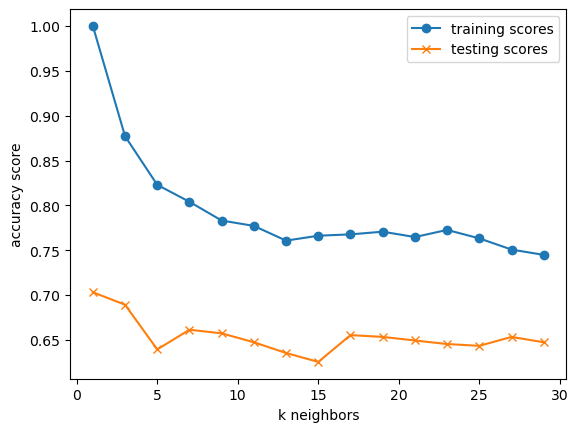

In [68]:
# Create empty lists to hold train and test scores
train_scores = []
test_scores = []
# Loop for k from 1 to 30 (odd numbers)
for k in range(1, 30, 2):
    # Create model object
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit model
    knn.fit(X_train, y_train)
    # Get score
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    # Add scores to lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    # Print scores
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 30, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 30, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [69]:
# Train the KNN model with the best k value
# Note that k: 27 seems to be the best choice for this dataset
knn_model = KNeighborsClassifier(n_neighbors=27)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [70]:
# Make predictions and print them
make_predictions(knn_model, 'K-Nearest Neighbors', X_train, X_test, 'n_neighbors=27')

Train Accuracy: 0.7507
Test Accuracy: 0.7042

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.69       343
           1       0.47      0.84      0.61       159

    accuracy                           0.65       502
   macro avg       0.68      0.70      0.65       502
weighted avg       0.76      0.65      0.66       502



### 8.4 Decision Trees

In [71]:
# Create Decision Tree Object
dt_model = tree.DecisionTreeClassifier(random_state=44)

In [72]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=44)

In [73]:
# Make predictions and print them
make_predictions(dt_model, 'Decision Tree Classifier', X_train, X_test)

Train Accuracy: 1.0000
Test Accuracy: 0.8559

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       343
           1       0.80      0.81      0.80       159

    accuracy                           0.87       502
   macro avg       0.85      0.86      0.86       502
weighted avg       0.87      0.87      0.87       502



### 8.5 Random Forest Classifier

In [74]:
# Create and train a Random Forest model
rfc_model = RandomForestClassifier(n_estimators=500, random_state=44)
# Fit Model
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=44)

In [75]:
# Make predictions
y_train_pred = rfc_model.predict(X_train)
y_test_pred = rfc_model.predict(X_test)

In [76]:
# Make predictions and print them
make_predictions(rfc_model, 'Random Forest Classifier', X_train, X_test, 'n_estimators=500')

Train Accuracy: 1.0000
Test Accuracy: 0.9131

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       343
           1       0.93      0.86      0.89       159

    accuracy                           0.93       502
   macro avg       0.93      0.91      0.92       502
weighted avg       0.93      0.93      0.93       502



### 8.6 Extremely Random Trees

In [77]:
# Create model object
etc_model = ExtraTreesClassifier(random_state=44)

In [78]:
# Fit the model
etc_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=44)

In [79]:
# Make predictions and print them
make_predictions(etc_model, 'Extra Trees Classifier', X_train, X_test)

Train Accuracy: 1.0000
Test Accuracy: 0.8896

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       343
           1       0.92      0.81      0.86       159

    accuracy                           0.92       502
   macro avg       0.92      0.89      0.90       502
weighted avg       0.92      0.92      0.92       502



### 8.7 Gradient Boosting Classifier

In [80]:
# Create boosting model
gbc_model = GradientBoostingClassifier(random_state=44)

In [81]:
# Fit the model
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=44)

In [82]:
# Make predictions and print them
make_predictions(gbc_model, 'Gradient Boosting Classifier', X_train, X_test)

Train Accuracy: 0.9408
Test Accuracy: 0.9090

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       343
           1       0.90      0.86      0.88       159

    accuracy                           0.93       502
   macro avg       0.92      0.91      0.91       502
weighted avg       0.93      0.93      0.93       502



### 8.8 Ada Boost Classifier

In [83]:
# Create Ada Boost Model
abc_model = AdaBoostClassifier(random_state=44)

In [84]:
# Fit the model
abc_model.fit(X_train, y_train)

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(random_state=44)

In [85]:
# Make predictions and print them
make_predictions(abc_model, 'Ada Boost Classifier', X_train, X_test)

Train Accuracy: 0.9095
Test Accuracy: 0.8843

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       343
           1       0.75      0.91      0.82       159

    accuracy                           0.88       502
   macro avg       0.85      0.88      0.86       502
weighted avg       0.89      0.88      0.88       502



### 8.9 Display the results

In [86]:
pd.DataFrame(model_performance)

,Model,Train Score,Test Score,f1 Score - 0,f1 Score - 1,Precision - 0,Parameters
0,Logistic Regression,0.714925,0.706034,0.732441,0.605911,0.858824,
1,Support Vector Classifier,0.925373,0.889772,0.928258,0.847352,0.932353,
2,K-Nearest Neighbors,0.750746,0.704182,0.690391,0.606335,0.885845,n_neighbors=27
3,Decision Tree Classifier,1.000000,0.855868,0.908029,0.802508,0.909357,
4,Random Forrest Classifier,1.000000,0.913096,0.952790,0.891803,0.935393,n_estimators=500
5,Extra Trees Classifier,1.000000,0.889625,0.941844,0.862876,0.917127,
6,Gradient Boosting Classifier,0.940796,0.908952,0.946609,0.881029,0.937143,
7,Ada Boost Classifier,0.909453,0.884317,0.905199,0.822857,0.951768,


The best precicion score is achieved with the Random Forrest Classifier and Ada Boost Classifier. We can try to optimize the model in the next section.

## 9. Optimization the best two models

### 9.1 Random Forest Classifier

#### 9.1.1 Varying the depth

In [87]:
# Try to find the best depth with the same n_estimator of 500
rfc2_models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    # Add depth to models dictionary
    rfc2_models['max_depth'].append(depth)
    # Create model object
    rfc2_model = RandomForestClassifier(n_estimators=500, max_depth=depth, random_state=44)
    # Fit Model
    rfc2_model.fit(X_train, y_train)
    # Make predictions
    y_test_pred = rfc2_model.predict(X_test)
    y_train_pred = rfc2_model.predict(X_train)
    # Add predictions to models dictionary
    rfc2_models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    rfc2_models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))
# Convert model to dataframe
rfc2_models_df = pd.DataFrame(rfc2_models)

<Axes: xlabel='max_depth'>

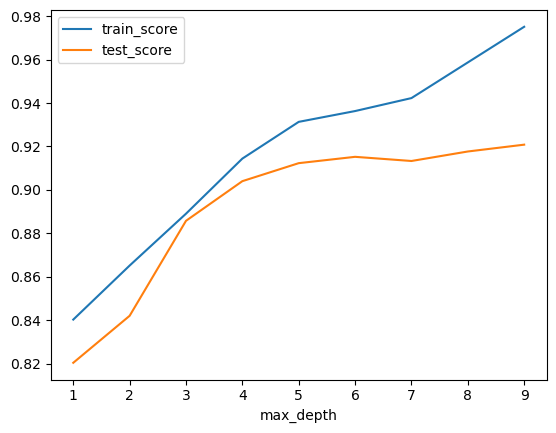

In [88]:
# Plot results
rfc2_models_df.plot(x='max_depth')

In [89]:
# it looks like the lines start to diverge a lot after 4
# Create and train a RandomForest model
rfc3_model = RandomForestClassifier(max_depth = 4, n_estimators=500, random_state=44)
# Fit the model
rfc3_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=44)

In [90]:
# Make predictions and print them
make_predictions(rfc3_model, 'Random Forest Classifier + Best Depth', X_train, X_test, 'max_depth=4, n_estimators=500')

Train Accuracy: 0.9144
Test Accuracy: 0.9040

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       343
           1       0.84      0.89      0.86       159

    accuracy                           0.91       502
   macro avg       0.89      0.90      0.90       502
weighted avg       0.91      0.91      0.91       502



#### 9.1.2 Hypertuning - GridSearch CV

In [91]:
# Create model
rfc4_model=RandomForestClassifier(random_state=44)

In [92]:
# Create list of parameters
param_grid = { 
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'random_state' : [44]
}

In [93]:
# Create GidSearchCV object
GCV_rfc4 = GridSearchCV(estimator=rfc4_model, param_grid=param_grid)
# Fit the model
GCV_rfc4.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=44),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 200, 300, 400, 500],
                         'random_state': [44]})

In [94]:
# Get best parameters
GCV_rfc4.best_params_

{'max_depth': 10, 'n_estimators': 100, 'random_state': 44}

In [95]:
# Create new model with the best results
rfc5_model=RandomForestClassifier(n_estimators= 100, max_depth=10, random_state=44)

In [96]:
# Fit the model
rfc5_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=44)

In [97]:
# Make predictions and print them
make_predictions(rfc5_model, 'Random Forest Classifier + Grid Search CV', X_train, X_test, 'max_depth=10, n_estimators=100')

Train Accuracy: 0.9826
Test Accuracy: 0.9208

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       343
           1       0.94      0.87      0.90       159

    accuracy                           0.94       502
   macro avg       0.94      0.92      0.93       502
weighted avg       0.94      0.94      0.94       502



#### 9.1.3 Hypertuning - Randomized Search CV

In [98]:
# Create model
rfc6_model=RandomForestClassifier(random_state=44)

In [99]:
# Create RandomizedSearchCV object
RCV_rfc6 = RandomizedSearchCV(rfc6_model, param_grid)
# Fit the model
RCV_rfc6.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=44),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500],
                                        'random_state': [44]})

In [100]:
# Make predictions and print them
make_predictions(RCV_rfc6, 'Random Forest Classifier + Randomized Search CV', X_train, X_test)

Train Accuracy: 0.9831
Test Accuracy: 0.9177

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       343
           1       0.94      0.86      0.90       159

    accuracy                           0.94       502
   macro avg       0.94      0.92      0.93       502
weighted avg       0.94      0.94      0.94       502



### 9.2 Ada Boost Classifier

#### 9.2.1 Hypertuning - Grid Search CV

In [101]:
# Create Ada Boost Model
abc2_model = AdaBoostClassifier(random_state=44)

In [102]:
# Create list of parameters
param_grid = { 
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate' : [0.001, 0.01, 0.1, 1.0, 10],
    'random_state' : [44]
}

In [103]:
# Create GidSearchCV object
GCV_abc2 = GridSearchCV(estimator=abc2_model, param_grid=param_grid)
# Fit the model
GCV_abc2.fit(X_train, y_train)

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkle

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkle

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkle

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkle

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkle

GridSearchCV(estimator=AdaBoostClassifier(random_state=44),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10],
                         'n_estimators': [50, 100, 200, 300, 400, 500],
                         'random_state': [44]})

In [104]:
# Get best parameters
GCV_abc2.best_params_

{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 44}

In [105]:
# Create new model with the best results
abc3_model=AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=44)

In [106]:
# Fit the model
abc3_model.fit(X_train, y_train)

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(learning_rate=0.1, random_state=44)

In [107]:
# Make predictions and print them
make_predictions(abc3_model, 'Ada Boost Classifier + Grid Search CV', X_train, X_test, 'learning_rate=0.1, n_estimators=50')

Train Accuracy: 0.9284
Test Accuracy: 0.9320

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       343
           1       0.93      0.89      0.91       159

    accuracy                           0.95       502
   macro avg       0.94      0.93      0.94       502
weighted avg       0.95      0.95      0.95       502



#### 9.2.2 Hypertuning - Randomized Search CV

In [108]:
# Create Ada Boost Model
abc4_model = AdaBoostClassifier(random_state=44)

In [109]:
# Create RandomizedSearchCV object
RCV_abc4 = RandomizedSearchCV(abc4_model, param_grid)
# Fit the model
RCV_abc4.fit(X_train, y_train)

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkle

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Users/jaidevkle

RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=44),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1.0,
                                                          10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500],
                                        'random_state': [44]})

In [110]:
# Make predictions and print them
make_predictions(RCV_abc4, 'Ada Boost Classifier + Randomized Search CV', X_train, X_test)

Train Accuracy: 0.9313
Test Accuracy: 0.9349

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       343
           1       0.95      0.89      0.92       159

    accuracy                           0.95       502
   macro avg       0.95      0.93      0.94       502
weighted avg       0.95      0.95      0.95       502



### 9.3 Compare results after Optimization

In [111]:
pd.DataFrame(model_performance)

,Model,Train Score,Test Score,f1 Score - 0,f1 Score - 1,Precision - 0,Parameters
0,Logistic Regression,0.714925,0.706034,0.732441,0.605911,0.858824,
1,Support Vector Classifier,0.925373,0.889772,0.928258,0.847352,0.932353,
2,K-Nearest Neighbors,0.750746,0.704182,0.690391,0.606335,0.885845,n_neighbors=27
3,Decision Tree Classifier,1.000000,0.855868,0.908029,0.802508,0.909357,
4,Random Forrest Classifier,1.000000,0.913096,0.952790,0.891803,0.935393,n_estimators=500
5,Extra Trees Classifier,1.000000,0.889625,0.941844,0.862876,0.917127,
6,Gradient Boosting Classifier,0.940796,0.908952,0.946609,0.881029,0.937143,
7,Ada Boost Classifier,0.909453,0.884317,0.905199,0.822857,0.951768,
8,Random Forest Classifier + Best Depth,0.914428,0.904038,0.933530,0.862385,0.946108,"max_depth=4, n_estimators=500"
9,Random Forest Classifier + Grid Search CV,0.982587,0.920843,0.957020,0.901961,0.940845,"max_depth=10, n_estimators=100"


The cost of a false positive is high so it would be best to use the Precision score.

### 9.5 Features that have the most impact

In [112]:
feature_names = abc_model.feature_names_in_
features = pd.DataFrame({'Feature': feature_names, 
                         'Importance': abc_model.feature_importances_ * 100})
features

,Feature,Importance
0,AgeMonths,12.0
1,WeightKg,34.0
2,Vaccinated,4.0
3,HealthCondition,4.0
4,TimeInShelterDays,16.0
5,AdoptionFee,10.0
6,PreviousOwner,0.0
7,x0_Cat,0.0
8,x0_Dog,2.0
9,x0_Rabbit,0.0


In [113]:
# Pet Type
features.loc[21] = ['Pet Type', sum(features.iloc[7:10,1])]
# Breed
features.loc[22] = ['Breed', sum(features.iloc[10:16,1])]
# Color
features.loc[23] = ['Color', sum(features.iloc[16:20,1])]

In [114]:
# Drop features with x0
features = features[~features['Feature'].str.contains('x0')]\
                    .sort_values('Importance', ascending=False)\
                    .reset_index(drop=True)
features

,Feature,Importance
0,WeightKg,34.0
1,TimeInShelterDays,16.0
2,Size,14.0
3,AgeMonths,12.0
4,AdoptionFee,10.0
5,Vaccinated,4.0
6,HealthCondition,4.0
7,Breed,4.0
8,Pet Type,2.0
9,PreviousOwner,0.0


In [115]:
px.bar(features[features['Importance'] > 0], 
       x='Feature', 
       y='Importance',
       color='Importance',
       color_continuous_scale = 'RdPu')

In [116]:
feature_names = rfc3_model.feature_names_in_
features = pd.DataFrame({'Feature': feature_names, 
                         'Importance': rfc3_model.feature_importances_ * 100})
features

,Feature,Importance
0,AgeMonths,16.863279
1,WeightKg,2.265422
2,Vaccinated,22.706590
3,HealthCondition,14.821644
4,TimeInShelterDays,2.117110
5,AdoptionFee,2.103012
6,PreviousOwner,0.144051
7,x0_Cat,0.226697
8,x0_Dog,3.012514
9,x0_Rabbit,1.118260


In [117]:
# Pet Type
features.loc[21] = ['Pet Type', sum(features.iloc[7:10,1])]
# Breed
features.loc[22] = ['Breed', sum(features.iloc[10:16,1])]
# Color
features.loc[23] = ['Color', sum(features.iloc[16:20,1])]

In [118]:
# Drop features with x0
features = features[~features['Feature'].str.contains('x0')]\
                    .sort_values('Importance', ascending=False)\
                    .reset_index(drop=True)
features

,Feature,Importance
0,Vaccinated,22.706590
1,Size,21.918517
2,AgeMonths,16.863279
3,HealthCondition,14.821644
4,Breed,11.398536
5,Pet Type,4.357471
6,WeightKg,2.265422
7,TimeInShelterDays,2.117110
8,AdoptionFee,2.103012
9,Color,1.304370


In [119]:
px.bar(features[features['Importance'] > 0], 
       x='Feature', 
       y='Importance',
       color='Importance',
       color_continuous_scale = 'RdPu')